## Example 1
**Model**: n-step unwinding with finite processivity.

**Laplace transform of f(t)**:
$$F(s) = P^n \dfrac{k_{obs}^{n}}{s(k_{obs}+s)^{n}}$$

**Simulation parameters**:
* number of steps $n$ = 5, 9, 13, 17
* observed rate constant $k_{obs}$ = 30
* Processivity $P$ = 0.9
* Time interval t = 0, ..., 2 sec
* Random signal noise $\sigma$ = 0.01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from globalfit import models

In [2]:
# parameters used for simulations
# k is a global parameter
k = 30.0
# A = P^n
P = 0.9
n = np.array([5., 9., 13., 17.])
# step-size
m = 4
# DNA lengths (bp)
L = m * n
noise = 0.01
# 2 sec 200 points
t = np.linspace(0.004, 2, 200)

# simulate toy data
data = np.zeros((200,5))
data[:,0] = t
np.random.seed(42)
for i in range(4):
    A = P**n[i]
    data[:,i+1] = models['nstep'](t, n[i], k, A) + noise * np.random.randn(len(t))

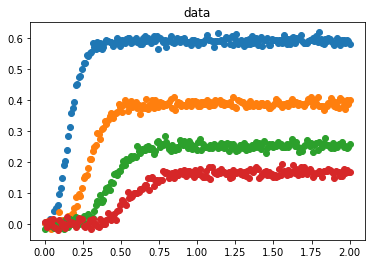

In [3]:
# plot the data
plt.figure(figsize=(6,4))
plt.plot(t, data[:,1:], 'o')
plt.title('data')
plt.show()

In [4]:
# save the data in data.csv file
np.savetxt('example1/data.csv', data, delimiter=',')

### Data fitting
Now we will fit our simulated data using globalfit

User-built models:
1. nstep
2. nstep_kckend
3. nstep_kckend_talbot
4. nstep_talbot


Type the name of your model:  nstep
DATA folder name:  example1


MODEL parameters: ['n', 'k', 'A']


GLOBAL parameters (comma separated):  k


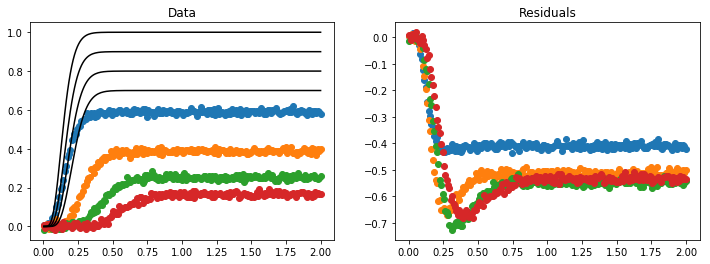

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [5]:
# import GlobalModel
from globalfit import GlobalModel

# start nstep model
# remember our simulated data is stored in example1 folder
# you can enter relative or absolute path to the example1 folder
# k will be a global parameter
# initial guesses will be read from params.gss file
nstep_model = GlobalModel()

MODEL parameters: ['n', 'k', 'A']


FIXED parameters (comma separated):  


Fitting ...
Parameters fit values:
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
A_1    0.5904     -inf      inf 0.0007606     True     None     None
A_2    0.3882     -inf      inf 0.0007994     True     None     None
A_3    0.2533     -inf      inf 0.0008436     True     None     None
A_4    0.1668     -inf      inf 0.0008948     True     None     None
k_1     29.48     -inf      inf   0.7049     True     None     None
k_2     29.48     -inf      inf   0.7049    False      k_1     None
k_3     29.48     -inf      inf   0.7049    False      k_1     None
k_4     29.48     -inf      inf   0.7049    False      k_1     None
n_1     4.969     -inf      inf    0.116     True     None     None
n_2     8.873     -inf      inf   0.2108     True     None     None
n_3     12.87     -inf      inf   0.3103     True     None     None
n_4     16.79     -inf      inf   0.4134     True     None     None
Chi2 7.63769297e-02


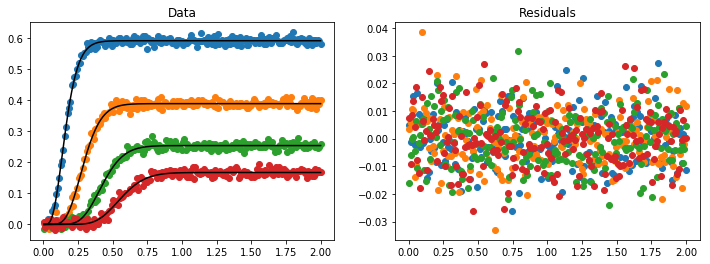

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


In [6]:
# float all parameters
nstep_model.fit()

In [7]:
# first over-write parameters
nstep_model.write()

----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


### Analyze results
Let's calculate step-size and macroscopic unwinding rate.

In [8]:
# retrieve fit results
n_fit = np.array([nstep_model.params['n_{}'.format(i+1)].value for i in range(4)])
k_fit = nstep_model.params['k_1'].value
k_err = nstep_model.params['k_1'].stderr

from scipy.stats import linregress
m_fit, d_fit, r_value, p_value, std_err = linregress(n_fit,L)

print('k_fit = {:.2f}±{:.2f} (k = {})'.format(k_fit, k_err, k))
print('m_fit = {:.2f}±{:.2f} (m = {})'.format(m_fit, std_err, m))
print('m_fit * k_fit = {:.1f}±{:.1f} (mk = {})'.format(m_fit*k_fit, (k_err/k_fit+std_err/m_fit)*m_fit*k_fit, m*k))

k_fit = 29.48±0.70 (k = 30.0)
m_fit = 4.06±0.01 (m = 4)
m_fit * k_fit = 119.6±3.2 (mk = 120.0)


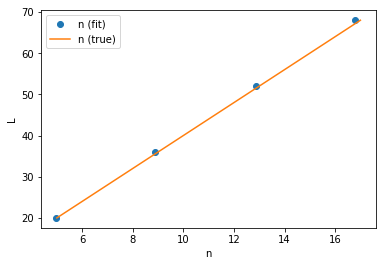

In [9]:
# plot
plt.figure(figsize=(6,4))
plt.plot(n_fit, L, 'o', label='n (fit)')
plt.plot(n, L, '-', label='n (true)')
plt.ylabel('L')
plt.xlabel('n')
plt.legend()
plt.show()

Display correlations between parameters using .report()

In [10]:
nstep_model.report()

[[Variables]]
    n_1:  4.96866226 +/- 0.11604658 (2.34%) (init = 6)
    n_2:  8.87265406 +/- 0.21077986 (2.38%) (init = 7)
    n_3:  12.8666016 +/- 0.31030936 (2.41%) (init = 8)
    n_4:  16.7859798 +/- 0.41338361 (2.46%) (init = 9)
    k_1:  29.4773429 +/- 0.70485309 (2.39%) (init = 40)
    k_2:  29.4773429 +/- 0.70485309 (2.39%) == 'k_1'
    k_3:  29.4773429 +/- 0.70485309 (2.39%) == 'k_1'
    k_4:  29.4773429 +/- 0.70485309 (2.39%) == 'k_1'
    A_1:  0.59043845 +/- 7.6058e-04 (0.13%) (init = 1)
    A_2:  0.38816641 +/- 7.9939e-04 (0.21%) (init = 0.9)
    A_3:  0.25334111 +/- 8.4361e-04 (0.33%) (init = 0.8)
    A_4:  0.16682480 +/- 8.9477e-04 (0.54%) (init = 0.7)
[[Correlations]] (unreported correlations are < 0.100)
    C(n_2, k_1) =  0.976
    C(n_1, k_1) =  0.975
    C(n_3, k_1) =  0.968
    C(n_1, n_2) =  0.952
    C(n_4, k_1) =  0.951
    C(n_2, n_3) =  0.945
    C(n_1, n_3) =  0.944
    C(n_2, n_4) =  0.928
    C(n_1, n_4) =  0.927
    C(n_3, n_4) =  0.920
    C(k_1, A_1) = -0

There is a positive correlation between $n$ and $k$ (equivalently, negative correlation between $m$ and $k$).
### Save results

In [11]:
# save fit results
nstep_model.save()

Saved parameters into file: params.out
Saved simulation into file: simulation.csv
Saved residuals into file: residual.csv
----------------------------------------------------------------------------
| .fit() | .write() | .read() | .plot() | | .report() | .save() | .emcee() |
----------------------------------------------------------------------------


### Calculate posterior distribution (optional)
(It is very slow).
From posterior distribution you can visually see positive correlation between $n$ and $k$.

It also correctly determined noise that has been added to the data.

100%|██████████| 1000/1000 [30:15<00:00,  1.82s/it]


median of posterior probability distribution
--------------------------------------------
[[Variables]]
    n_1:    4.96151719 +/- 0.12837382 (2.59%) (init = 4.968662)
    n_2:    8.85545925 +/- 0.23857765 (2.69%) (init = 8.872654)
    n_3:    12.8420336 +/- 0.35931462 (2.80%) (init = 12.8666)
    n_4:    16.7541327 +/- 0.44416685 (2.65%) (init = 16.78598)
    k_1:    29.4282230 +/- 0.78446809 (2.67%) (init = 29.47734)
    k_2:    29.4282230 == 'k_1'
    k_3:    29.4282230 == 'k_1'
    k_4:    29.4282230 == 'k_1'
    A_1:    0.59041848 +/- 7.2787e-04 (0.12%) (init = 0.5904385)
    A_2:    0.38827969 +/- 7.9450e-04 (0.20%) (init = 0.3881664)
    A_3:    0.25337406 +/- 8.4590e-04 (0.33%) (init = 0.2533411)
    A_4:    0.16690722 +/- 9.1846e-04 (0.55%) (init = 0.1668248)
    noise:  0.00986733 +/- 2.5398e-04 (2.57%) (init = 0.07637693)
[[Correlations]] (unreported correlations are < 0.100)
    C(n_1, k_1) =  0.980
    C(n_2, k_1) =  0.980
    C(n_3, k_1) =  0.974
    C(n_1, n_2) =  0.961


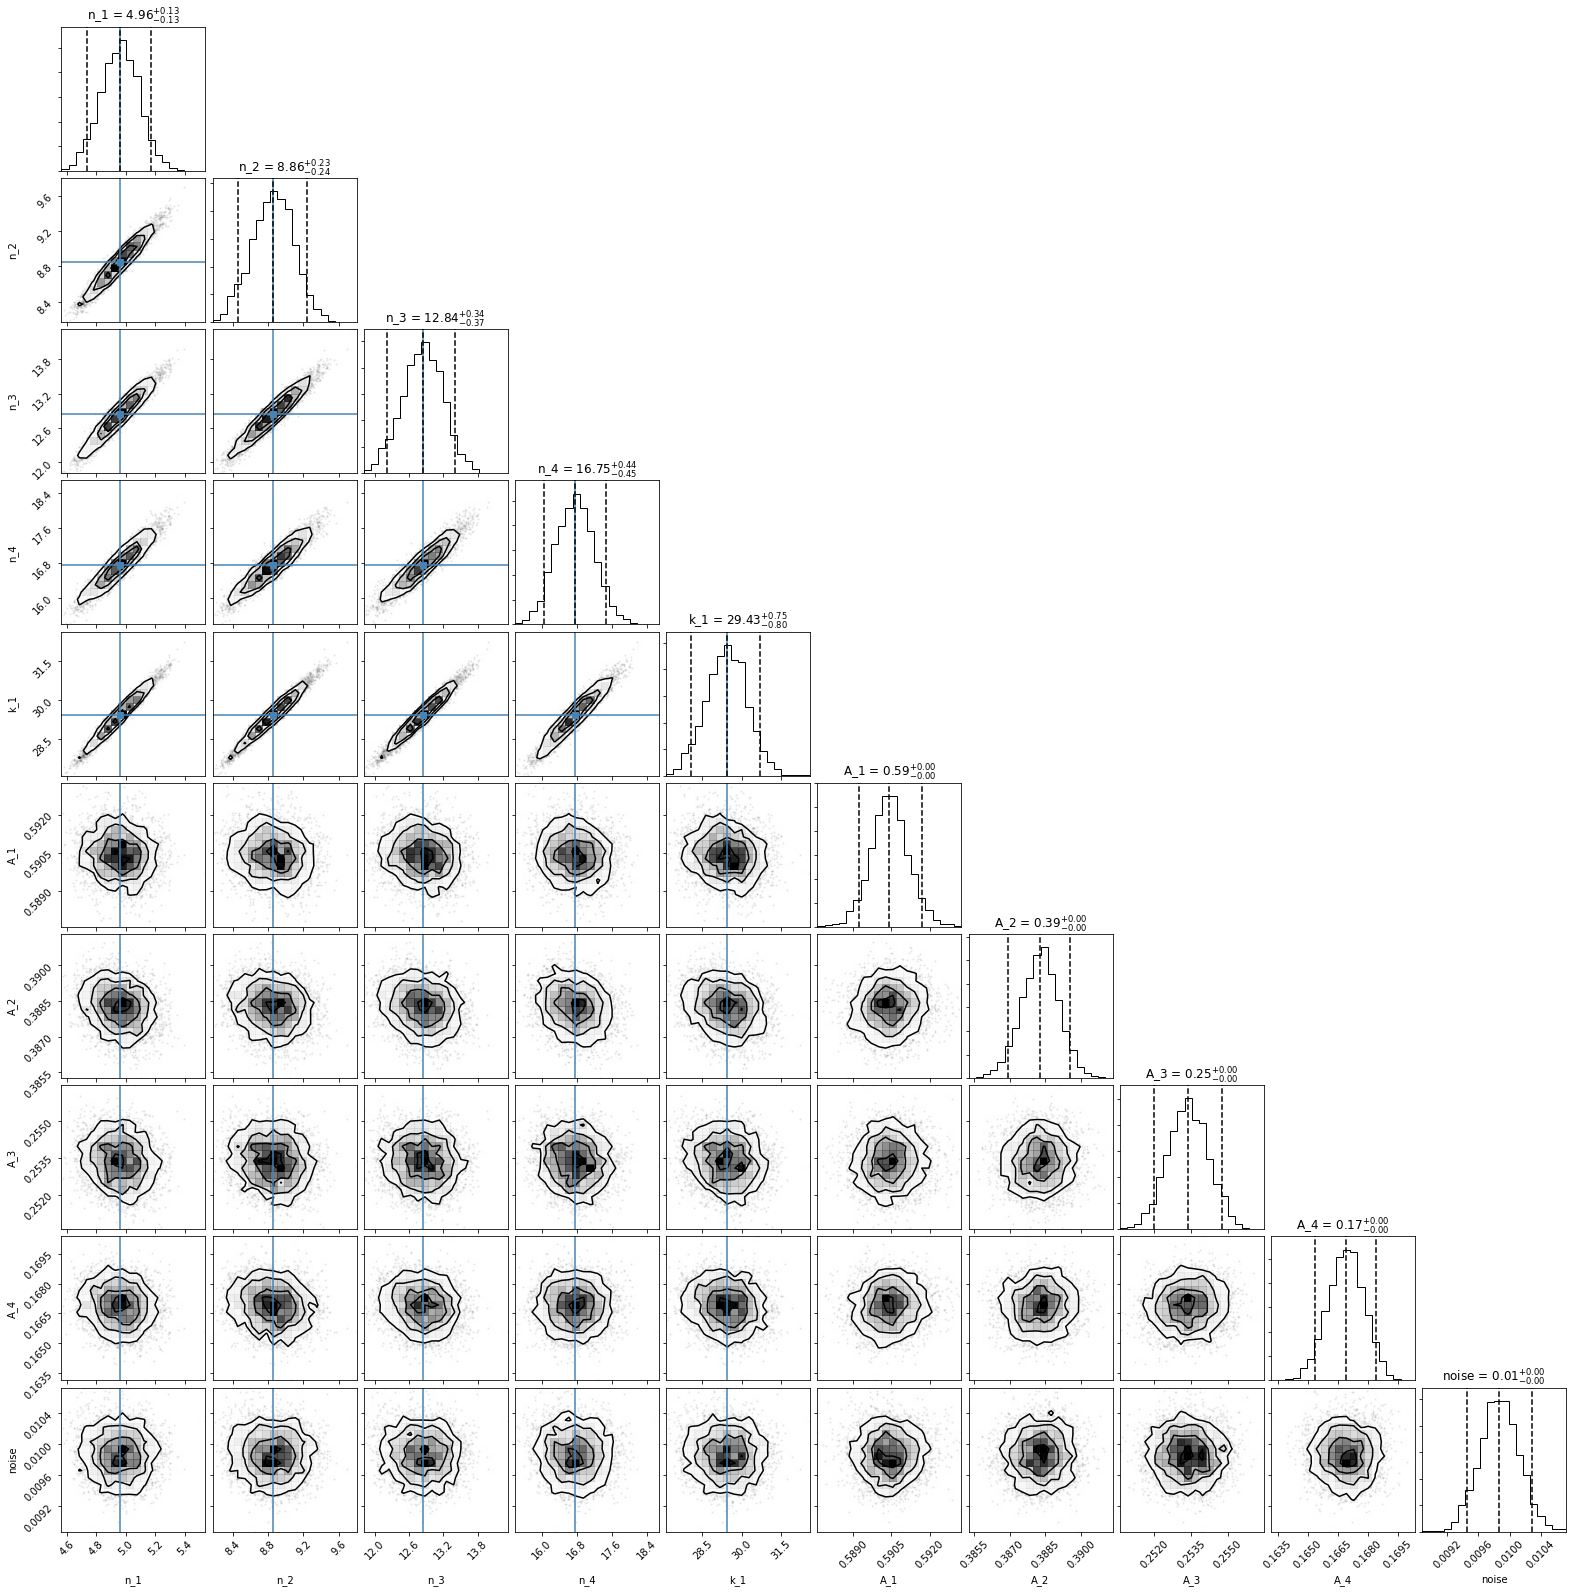

In [12]:
nstep_model.emcee(burn=300, steps=1000, thin=20)